In [64]:
# step 1- creating a data frame
#https://www.kaggle.com/code/gova26/linear-regression-on-real-estate-data-set
import pandas as pd
df = pd.read_csv('/content/Real estate.csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [65]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [67]:
df.shape


(414, 8)

In [68]:
#step 2 - NO column is not important as it represents the serial no, so we can drop that column
#also X1 transaction date is not important
df=df.drop("No",axis=1)
df=df.drop("X1 transaction date",axis=1)
df

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


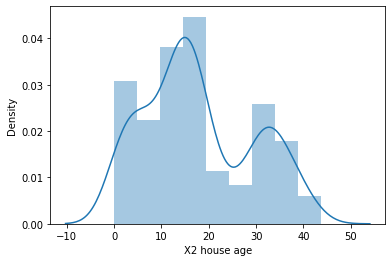

In [69]:
#step 3 - DataVisualization
import seaborn as sns
sns.distplot(df['X2 house age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


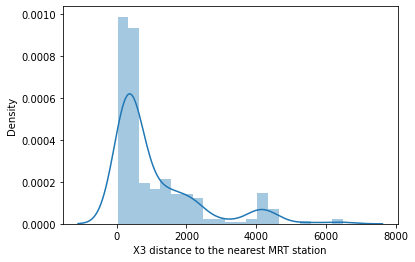

In [70]:
sns.distplot(df['X3 distance to the nearest MRT station'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


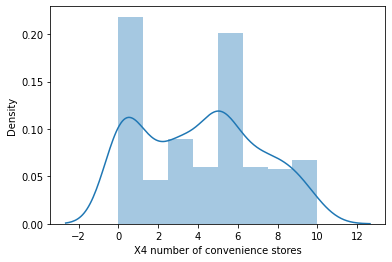

In [71]:
sns.distplot(df['X4 number of convenience stores'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


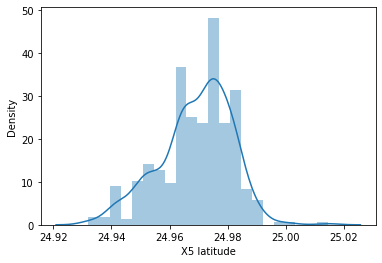

In [72]:
sns.distplot(df['X5 latitude'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


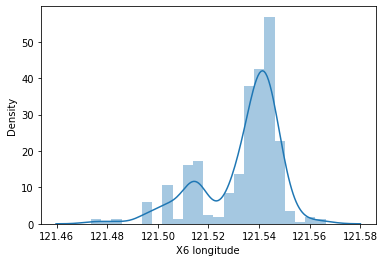

In [73]:
sns.distplot(df['X6 longitude'])

In [74]:
#step 4 - divide into input(x) and output(y) 
#input variable - should be 2D array
x=df.iloc[:,0:5].values
x

array([[ 32.     ,  84.87882,  10.     ,  24.98298, 121.54024],
       [ 19.5    , 306.5947 ,   9.     ,  24.98034, 121.53951],
       [ 13.3    , 561.9845 ,   5.     ,  24.98746, 121.54391],
       ...,
       [ 18.8    , 390.9696 ,   7.     ,  24.97923, 121.53986],
       [  8.1    , 104.8101 ,   5.     ,  24.96674, 121.54067],
       [  6.5    ,  90.45606,   9.     ,  24.97433, 121.5431 ]])

In [75]:
#output variable - 1D array
y=df.iloc[:,5].values
y

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

In [76]:
#step 5 - train and testing the variables
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
#we can vary the test size it could be 30(0.3), 25(0.25), 20(0.2)

In [77]:
#step 6 - Normalize (Scaling) the data (Inputs only)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(x_train)
X_test=ss.transform(x_test)

In [78]:
#step 7 -Run a Classifier/Regressor/Clusterer(Apply suitable Algorithm)
# Linear Regressor algorithm is best suited
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#step 8 - Fit the model (Map inputs with output)
model.fit(X_train,y_train)

LinearRegression()

In [79]:
#step 9 - Predict the output
y_pred=model.predict(X_test)
y_pred

array([41.35544185, 12.49886303, 41.50212651, 12.31019071, 40.3429954 ,
       40.8181752 , 40.44365022, 34.02135909, 48.49600052, 44.84604191,
       45.72690242, 41.02648778, 40.75916884, 40.75268804, 49.05615668,
       36.13665242, 40.54251618, 42.25175221, 42.19524166, 44.11792709,
       52.67685186, 31.11947079, 41.40316934, 46.1721079 , 47.6863238 ,
       45.04537264, 45.61075462, 28.7679283 , 47.92620258, 23.97733268,
       43.11356061, 33.10735961, 43.93615567, 36.38752832, 45.74126991,
       31.06726468, 48.28524625, 39.0285999 , 54.48957074, 10.1993949 ,
       51.79868565, 34.30074616, 35.97866468, 48.57895478, 14.90145262,
       43.00649606, 45.05098252, 15.45028581, 32.79208687, 46.8960413 ,
       52.46802741, 41.72337802, 49.57103741, 24.71922345, 31.14557385,
       36.14957404, 48.72171034, 40.8254577 , 45.83131465, 33.21177183,
       42.76249088, 42.83985836, 39.62172699, 48.65261885, 39.54180331,
       30.24726865, 12.77682481, 32.96304505, 48.90443174, 40.81

In [80]:
y_test

array([45.3, 14.4, 46. , 15.6, 50.2, 38.1, 48.5, 41.4, 51.6, 40.1, 42. ,
       42.4, 28.5, 39.1, 53.7, 36.8, 40.6, 55.2, 39.3, 44.3, 53.5, 25.3,
       22.8, 51.7, 45.5, 34.4, 31.6, 25.9, 49.5, 24.7, 51.7, 29.7, 45.4,
       50.5, 26.5, 30.1, 46.1, 28.9, 54.4, 15. , 44.9, 29.8, 23.6, 48. ,
       16.7, 40.9, 40.2, 12.9, 21.3, 62.1, 63.9, 40.3, 42.2, 19.1, 28.4,
       28.5, 60.7, 37.5, 39.3, 28.8, 42.3, 44.3, 42.6, 57.4, 42.2, 25.7,
       13.2, 27. , 56.2, 38.3, 20.8, 43.1, 78.3, 20.9, 32.5, 33.4, 32.1,
       19.2, 53. , 38.2, 46.7, 24.6, 36.2, 23.2, 29.3, 38.4, 37.5, 34.3,
       44.8, 54.4, 37.9,  7.6, 29.5, 25.3, 13.7, 30. , 30.8, 40.6, 20.7,
       40.8, 55.3, 40.5, 40.8, 40.3])

In [81]:
#step 10 -Evaluation : Accuracy score , Confusion Matrix
# we cannot find accuracy by accuracy_score for regression models
print(y_pred[0:5],y_test[0:5])


[41.35544185 12.49886303 41.50212651 12.31019071 40.3429954 ] [45.3 14.4 46.  15.6 50.2]


In [82]:
#Best fit line equation 
#As we have 5-independent variables and 1-dependent variable the equation will be
# y = m1*x1 + m2*x2 + m3*x3 + m4*x4 + m5*x5 + c
model.intercept_ # gives the y intercept which is c
model.coef_ # gives slope of the above line(m1,m2,m3,m4,m5)


array([-2.94765425, -5.23678971,  3.46636172,  2.9712075 ,  0.06233151])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


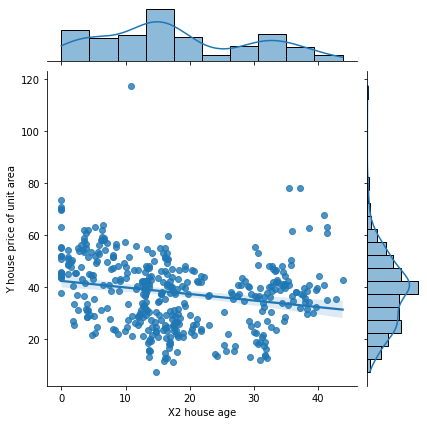

In [83]:
#Line of best fit for different variables
sns.jointplot("X2 house age","Y house price of unit area",data=df,kind='reg')

In [84]:
df.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


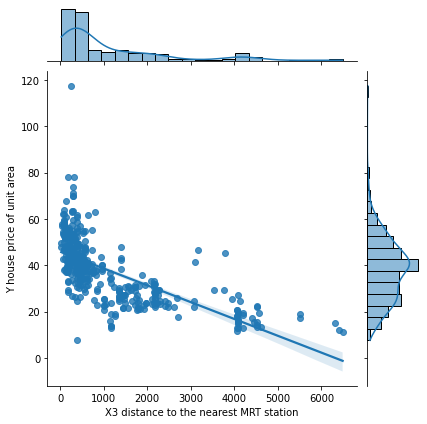

In [85]:
sns.jointplot("X3 distance to the nearest MRT station","Y house price of unit area",data=df,kind='reg')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


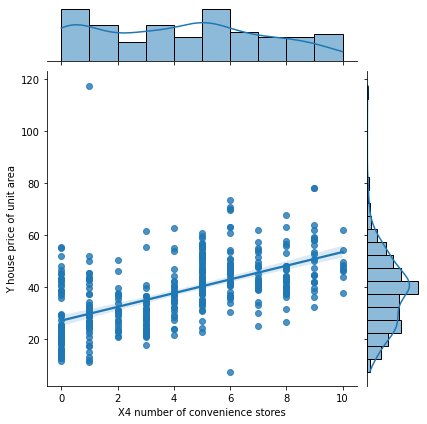

In [86]:
sns.jointplot("X4 number of convenience stores","Y house price of unit area",data=df,kind='reg')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


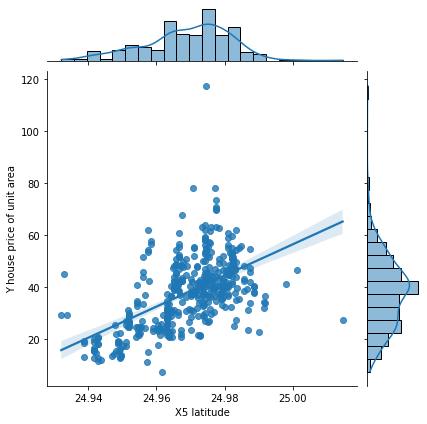

In [87]:
sns.jointplot("X5 latitude","Y house price of unit area",data=df,kind='reg')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


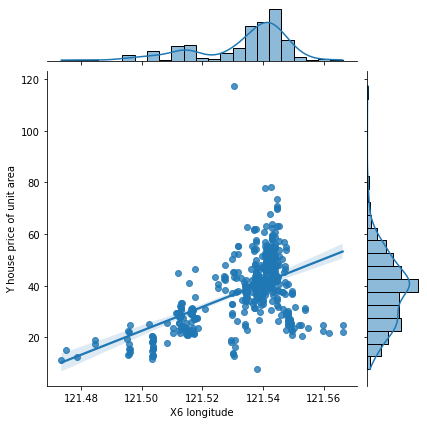

In [88]:
sns.jointplot("X6 longitude","Y house price of unit area",data=df,kind='reg')